# 1. Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import scipy
import os
from google.colab import drive
#Matplotlib dan seaborn sebagai visualization libraries. 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#Standardisasi data dilakukan dengan memanfaatkan fitur StandardScaler dari sklearn.preprocessing
from sklearn.preprocessing import StandardScaler
#Hierarchical clustering with the Sci Py library. We'll use the dendrogram and linkage modules.
from scipy.cluster.hierarchy import dendrogram, linkage
#Sklearn merupakan satu dari libraries yang umum digunakan untuk machine learning. 
#Kita gunakan modul K-Means dan PCA pada segmentasi ini.
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 2. Load Data

In [ ]:
#!ls "/content/drive/My Drive/Colab Notebooks/skripsiUME/"
df = pd.read_csv('dschh.csv', index_col = 0, sep=';')

# 3. Preprocessing Data

In [ ]:
#Tampilkan semua data.
pd.set_option('display.max_rows', None)
df

,Nama,Usia,Tinggi Badan,Berat Badan,Lemak Tubuh,Kadar Air,Massa Otot,Kalori,Usia Sel,Kepadatan Tulang,Lemak Perut,Jenis Kelamin
No.,,,,,,,,,,,,
1,Husna,49,142.0,47.8,36.6,46.4,28.8,911,53,1.5,6,Wanita
2,Muyati,59,150.0,58.6,36.7,46.3,35.0,1098,56,2.1,8,Wanita
3,Eka,24,167.0,73.0,37.9,45.5,42.6,1437,46,2.8,6,Wanita
4,Hedi,65,159.0,71.8,23.3,56.2,52.2,1501,45,2.9,17,Laki-laki
5,Yuni,41,154.0,117.3,60.8,43.1,43.1,1638,66,2.8,18,Wanita
6,Hunaroli,64,160.0,69.9,27.4,53.1,48.5,1383,60,2.6,17,Wanita
7,Ajis,46,170.0,72.3,56.6,45.1,52.9,1543,40,2.9,12,Wanita
8,Misudas,48,150.0,79.2,48.2,37.9,38.6,1305,73,2.4,12,Wanita
9,Mursidah,52,155.0,75.4,44.9,40.9,39.6,1304,73,2.5,11,Wanita


In [ ]:
#Mencetak dimensi data (baris, kolom)
print(df.shape) 
#Mengecek tipe data pada dataset
print(df.dtypes)

(280, 12)
Nama                 object
Usia                  int64
Tinggi Badan        float64
Berat Badan         float64
Lemak Tubuh         float64
Kadar Air           float64
Massa Otot          float64
Kalori                int64
Usia Sel              int64
Kepadatan Tulang    float64
Lemak Perut           int64
Jenis Kelamin        object
dtype: object


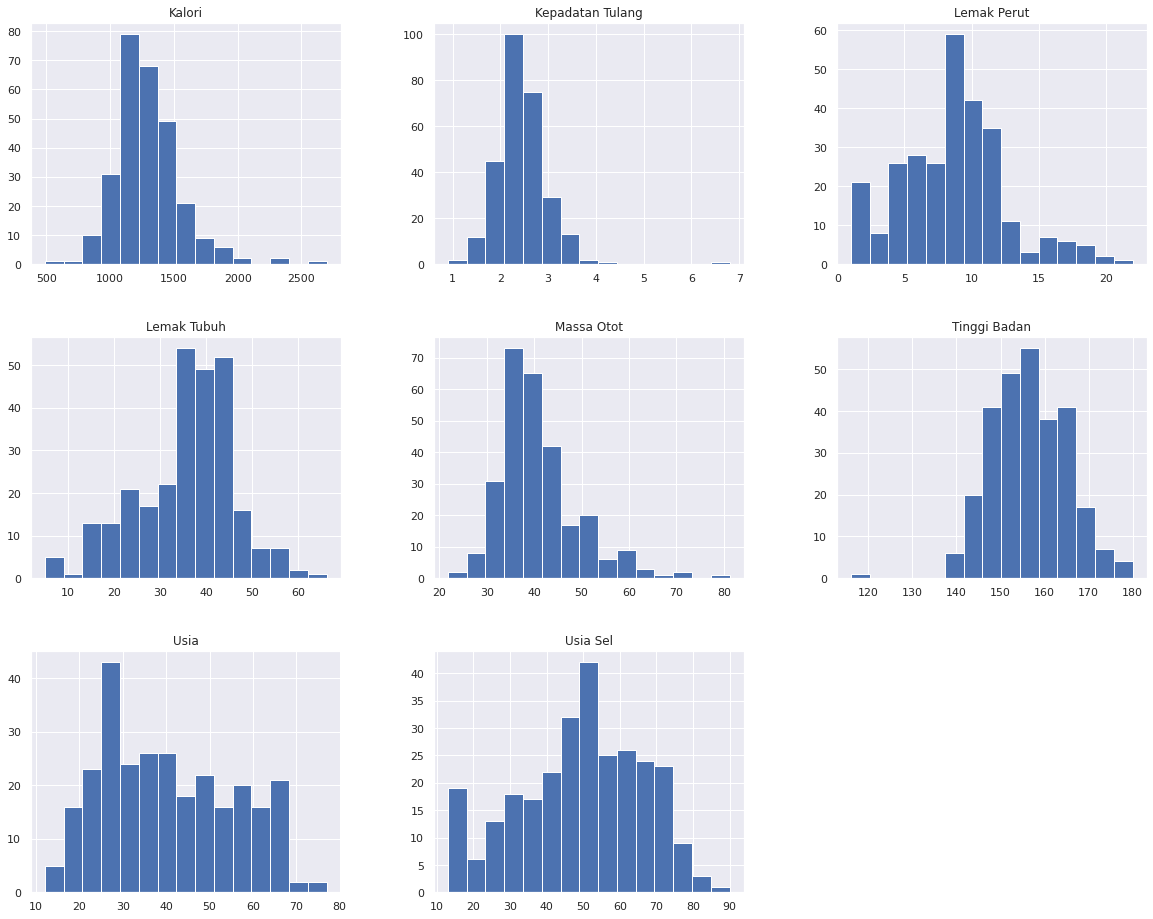

In [ ]:
#Seleksi data untuk divisualisasikan distribusi datanya
numerical = [
  'Usia', 'Tinggi Badan', 'Lemak Tubuh', 'Massa Otot', 'Kalori', 'Usia Sel', 'Kepadatan Tulang', 'Lemak Perut', 'Jenis Kelamin'
]

df[numerical].hist(bins=15, figsize=(20, 16), layout=(3, 3));

In [ ]:
#Mengecek variabel yang memiliki null value  (NaN)
df.isnull().sum()

Nama                0
Usia                0
Tinggi Badan        1
Berat Badan         3
Lemak Tubuh         0
Kadar Air           0
Massa Otot          0
Kalori              0
Usia Sel            0
Kepadatan Tulang    0
Lemak Perut         0
Jenis Kelamin       0
dtype: int64

In [ ]:
#Menampilkan data pelanggan yang Tinggi Badannya tidak terinput (Kosong)
df[df['Tinggi Badan'].isna()].head()

,Nama,Usia,Tinggi Badan,Berat Badan,Lemak Tubuh,Kadar Air,Massa Otot,Kalori,Usia Sel,Kepadatan Tulang,Lemak Perut,Jenis Kelamin
No.,,,,,,,,,,,,
240,Mai,30,NaN,51.2,34.8,47.8,31.6,1031,41,1.8,6,Wanita


In [ ]:
#Menampilkan data pelanggan yang Berat Badannya tidak terinput (Kosong)
df[df['Berat Badan'].isna()].head()

,Nama,Usia,Tinggi Badan,Berat Badan,Lemak Tubuh,Kadar Air,Massa Otot,Kalori,Usia Sel,Kepadatan Tulang,Lemak Perut,Jenis Kelamin
No.,,,,,,,,,,,,
61,Anirohmi,44,165.0,NaN,58.0,30.8,46.9,1248,69,3.2,16,Wanita
185,Iyan,22,176.0,NaN,43.2,41.6,81.2,2697,47,4.4,22,Laki-laki
260,Ajeng,29,157.0,NaN,34.5,48.2,38.4,1250,41,2.4,6,Wanita


In [ ]:
#Mengisi null value pada variabel Tinggi Badan dengan Mean dari Data Tinggi Badan
df['Tinggi Badan'] = df['Tinggi Badan'].fillna( df['Tinggi Badan'].mean()).round(1)
#Mengisi null value pada variabel Berat Badan dengan Mean dari Data Berat Badan
df['Berat Badan'] = df['Berat Badan'].fillna( df['Berat Badan'].mean()).round(1)

In [ ]:
#Menampilkan kembali data pelanggan yang
df[(df['Nama'] == "Mai") | (df['Nama'] == "Anirohmi") | (df['Nama'] == "Iyan") | (df['Nama'] == "Ajeng")]

,Nama,Usia,Tinggi Badan,Berat Badan,Lemak Tubuh,Kadar Air,Massa Otot,Kalori,Usia Sel,Kepadatan Tulang,Lemak Perut,Jenis Kelamin
No.,,,,,,,,,,,,
61,Anirohmi,44,165.0,67.4,58.0,30.8,46.9,1248,69,3.2,16,Wanita
185,Iyan,22,176.0,67.4,43.2,41.6,81.2,2697,47,4.4,22,Laki-laki
240,Mai,30,156.5,51.2,34.8,47.8,31.6,1031,41,1.8,6,Wanita
260,Ajeng,29,157.0,67.4,34.5,48.2,38.4,1250,41,2.4,6,Wanita


In [ ]:
df

,Nama,Usia,Tinggi Badan,Berat Badan,Lemak Tubuh,Kadar Air,Massa Otot,Kalori,Usia Sel,Kepadatan Tulang,Lemak Perut,Jenis Kelamin
No.,,,,,,,,,,,,
1,Husna,49,142.0,47.8,36.6,46.4,28.8,911,53,1.5,6,Wanita
2,Muyati,59,150.0,58.6,36.7,46.3,35.0,1098,56,2.1,8,Wanita
3,Eka,24,167.0,73.0,37.9,45.5,42.6,1437,46,2.8,6,Wanita
4,Hedi,65,159.0,71.8,23.3,56.2,52.2,1501,45,2.9,17,Laki-laki
5,Yuni,41,154.0,117.3,60.8,43.1,43.1,1638,66,2.8,18,Wanita
6,Hunaroli,64,160.0,69.9,27.4,53.1,48.5,1383,60,2.6,17,Wanita
7,Ajis,46,170.0,72.3,56.6,45.1,52.9,1543,40,2.9,12,Wanita
8,Misudas,48,150.0,79.2,48.2,37.9,38.6,1305,73,2.4,12,Wanita
9,Mursidah,52,155.0,75.4,44.9,40.9,39.6,1304,73,2.5,11,Wanita


In [ ]:
#Masih terdapat data dalam bentuk string dan bertipe categorical data, 
#maka kita ubah jenis kelamin ke dalam biner.
df["Jenis Kelamin"] = df["Jenis Kelamin"].map({
    "Wanita": 0,
    "Laki-laki": 1
}.get)
df

,Nama,Usia,Tinggi Badan,Berat Badan,Lemak Tubuh,Kadar Air,Massa Otot,Kalori,Usia Sel,Kepadatan Tulang,Lemak Perut,Jenis Kelamin
No.,,,,,,,,,,,,
1,Husna,49,142.0,47.8,36.6,46.4,28.8,911,53,1.5,6,0
2,Muyati,59,150.0,58.6,36.7,46.3,35.0,1098,56,2.1,8,0
3,Eka,24,167.0,73.0,37.9,45.5,42.6,1437,46,2.8,6,0
4,Hedi,65,159.0,71.8,23.3,56.2,52.2,1501,45,2.9,17,1
5,Yuni,41,154.0,117.3,60.8,43.1,43.1,1638,66,2.8,18,0
6,Hunaroli,64,160.0,69.9,27.4,53.1,48.5,1383,60,2.6,17,0
7,Ajis,46,170.0,72.3,56.6,45.1,52.9,1543,40,2.9,12,0
8,Misudas,48,150.0,79.2,48.2,37.9,38.6,1305,73,2.4,12,0
9,Mursidah,52,155.0,75.4,44.9,40.9,39.6,1304,73,2.5,11,0


In [ ]:
#Kita hanya butuh data numerical untuk diolah ke dalam model kmeans, 
#oleh karena itu langkah selanjutnya hapus kolom nama
df = df.drop(columns='Nama')
df

,Usia,Tinggi Badan,Berat Badan,Lemak Tubuh,Kadar Air,Massa Otot,Kalori,Usia Sel,Kepadatan Tulang,Lemak Perut,Jenis Kelamin
No.,,,,,,,,,,,
1,49,142.0,47.8,36.6,46.4,28.8,911,53,1.5,6,0
2,59,150.0,58.6,36.7,46.3,35.0,1098,56,2.1,8,0
3,24,167.0,73.0,37.9,45.5,42.6,1437,46,2.8,6,0
4,65,159.0,71.8,23.3,56.2,52.2,1501,45,2.9,17,1
5,41,154.0,117.3,60.8,43.1,43.1,1638,66,2.8,18,0
6,64,160.0,69.9,27.4,53.1,48.5,1383,60,2.6,17,0
7,46,170.0,72.3,56.6,45.1,52.9,1543,40,2.9,12,0
8,48,150.0,79.2,48.2,37.9,38.6,1305,73,2.4,12,0
9,52,155.0,75.4,44.9,40.9,39.6,1304,73,2.5,11,0


In [ ]:
df.to_csv(r'datastandar.csv', index = False, header=True)

In [ ]:
#Standardisasi Data, dimana semua variabel akan memiliki bobot yang sama. 
#Ini penting untuk tahap pemodelan nantinya.
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df)
segmentation_std

array([[ 0.57809437, -1.7173112 , -1.22428387, ..., -1.68070372,
        -0.6391846 , -0.40227568],
       [ 1.24530963, -0.77134364, -0.54845933, ..., -0.60464341,
        -0.13645514, -0.40227568],
       [-1.08994379,  1.23883743,  0.35264006, ...,  0.65076028,
        -0.6391846 , -0.40227568],
       ...,
       [ 0.64481589, -1.36257336,  0.62171835, ..., -0.42530003,
         1.12036851, -0.40227568],
       [ 0.44465132, -0.06186797,  2.36759842, ...,  0.4714169 ,
         1.8744627 , -0.40227568],
       [ 0.24448674,  0.41111581, -0.30441158, ...,  1.18879044,
        -0.38781987, -0.40227568]])

# 4. Analisis Deskriptif dan Eksplorasi Data

In [ ]:
#Ini merupakan tahap awal dari Analisis Deskriptif dan Eksplorasi Data. 
#Dengan analisis ini kita dapat menggali informasi di dalamnya. 
df.describe().round(2)

,Usia,Tinggi Badan,Berat Badan,Lemak Tubuh,Kadar Air,Massa Otot,Kalori,Usia Sel,Kepadatan Tulang,Lemak Perut,Jenis Kelamin
count,280.00,280.00,280.00,280.00,280.00,280.00,280.00,280.00,280.00,280.00,280.00
mean,40.34,156.52,67.36,35.75,47.14,40.88,1291.24,49.26,2.44,8.54,0.14
std,15.01,8.47,16.01,10.66,8.14,8.45,259.15,17.03,0.56,3.99,0.35
min,12.00,116.00,27.80,5.00,23.80,21.80,487.00,13.00,0.90,1.00,0.00
25%,28.00,151.00,57.22,30.05,41.98,35.38,1123.00,37.75,2.10,6.00,0.00
50%,38.00,155.00,66.70,37.15,45.80,38.65,1249.00,50.00,2.40,8.50,0.00
75%,52.25,162.00,75.58,43.12,52.00,44.28,1427.00,62.00,2.70,10.25,0.00
max,77.00,180.00,125.00,66.20,74.70,81.20,2697.00,90.00,6.80,22.00,1.00


In [ ]:
#Hitung Pearson Correlation Coefficient untuk setiap variabel dalam dataset kita.
#Correlation method pada pandas secara default menggunakan Pearson Correlation.
#Mencari korelasi antar variabel
#https://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/
df.corr().round(2)

,Usia,Tinggi Badan,Berat Badan,Lemak Tubuh,Kadar Air,Massa Otot,Kalori,Usia Sel,Kepadatan Tulang,Lemak Perut,Jenis Kelamin
Usia,1.00,-0.29,-0.09,0.13,-0.12,-0.18,-0.29,0.55,-0.26,0.31,-0.11
Tinggi Badan,-0.29,1.00,0.40,-0.31,0.28,0.70,0.71,-0.27,0.70,0.16,0.51
Berat Badan,-0.09,0.40,1.00,0.57,-0.51,0.58,0.79,0.48,0.65,0.77,0.08
Lemak Tubuh,0.13,-0.31,0.57,1.00,-0.84,-0.10,0.13,0.75,0.09,0.51,-0.51
Kadar Air,-0.12,0.28,-0.51,-0.84,1.00,0.08,-0.14,-0.68,-0.08,-0.48,0.48
Massa Otot,-0.18,0.70,0.58,-0.10,0.08,1.00,0.82,-0.01,0.71,0.53,0.55
Kalori,-0.29,0.71,0.79,0.13,-0.14,0.82,1.00,0.12,0.79,0.61,0.42
Usia Sel,0.55,-0.27,0.48,0.75,-0.68,-0.01,0.12,1.00,0.06,0.64,-0.32
Kepadatan Tulang,-0.26,0.70,0.65,0.09,-0.08,0.71,0.79,0.06,1.00,0.46,0.30
Lemak Perut,0.31,0.16,0.77,0.51,-0.48,0.53,0.61,0.64,0.46,1.00,0.11


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


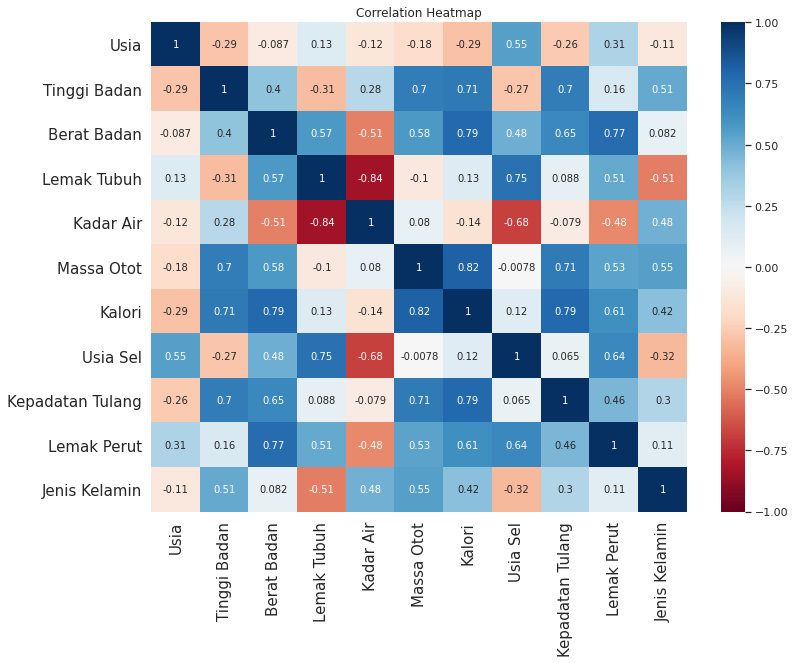

In [ ]:
#Plot correlation dengan Heat Map. Heat Map adalah teknik visualisasi yang cocok 
#untuk melihat correlations menggunakan intensitas warna.
#Plot dengan RdBu Scheme (Red to Blue).
#Atur range dari -1 sampai 1 sebagai  range dari Pearson Correlation. 
plt.figure(figsize = (12, 9))
s = sns.heatmap(df.corr(),
               annot = True, 
               cmap = 'RdBu',
               vmin = -1, 
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 15)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 15)
plt.title('Correlation Heatmap')
plt.savefig(fname='correlation heatmap.png', dpi=None, facecolor='w', edgecolor='w',
        orientation='potrait', papertype=None, format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.2,
        frameon=None, metadata=None)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  # This is added back by InteractiveShellApp.init_path()


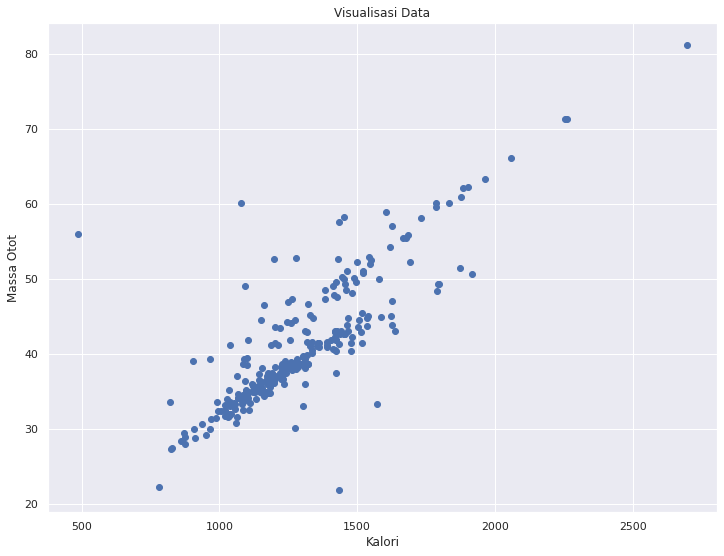

In [ ]:
#Kita punya 280 data points, dimana kita akan melakukan scatter plot pada data Kalori dan Massa Otot, 
#yang lokasi index variabelnya berada di 6 dan 5. 
plt.figure(figsize = (12, 9))  #Kita plot data ukuran frame 12x9 inc
plt.scatter(df.iloc[:, 6], df.iloc[:, 5])
plt.xlabel('Kalori')
plt.ylabel('Massa Otot')
plt.title('Visualisasi Data')
plt.savefig(fname='Vis Kalori vs Massa Otot.png', dpi=None, facecolor='w', edgecolor='w',
        orientation='potrait', papertype=None, format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.2,
        frameon=None, metadata=None)
plt.show()

# 5. Hierarchical Clustering

In [ ]:
# Perform Hierarchical Clustering. The results are returned as a linkage matrix. 
hier_clust = linkage(segmentation_std, method = 'ward')

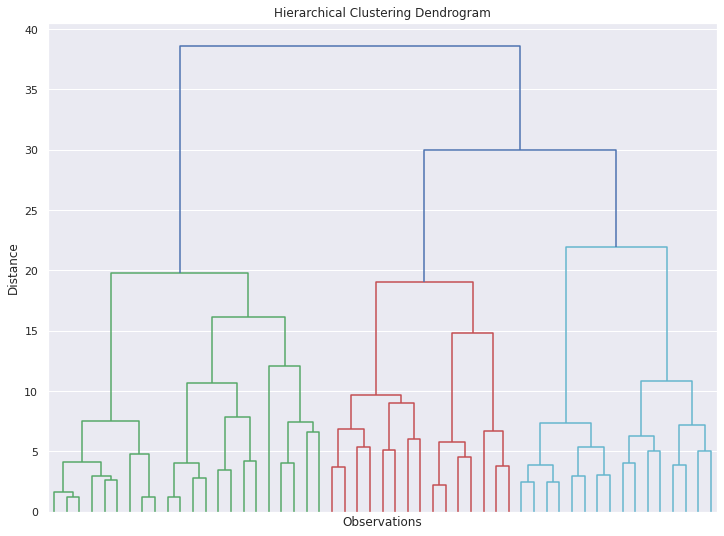

In [ ]:
# We plot the results from the Hierarchical Clustering using a Dendrogram. 
# We truncate the dendrogram for better readability. The level p shows only the last p merged clusters
# We also omit showing the labels for each point.
plt.figure(figsize = (12,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
           truncate_mode = 'level', 
           p = 5, 
           show_leaf_counts = False, 
           no_labels = True)
plt.show()

# 6. K-Means Clustering

In [ ]:
# Menerapkan K-Means Clustering. Mempertimbangkan 1 sampai 10 kluster, 
# sehingga loop untuk menjalankan 10 iterasi.
# Gunakan 'k-means++' pada parameter init .  
# Dan mengambil secara acak titik awal.
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(segmentation_std)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  # This is added back by InteractiveShellApp.init_path()


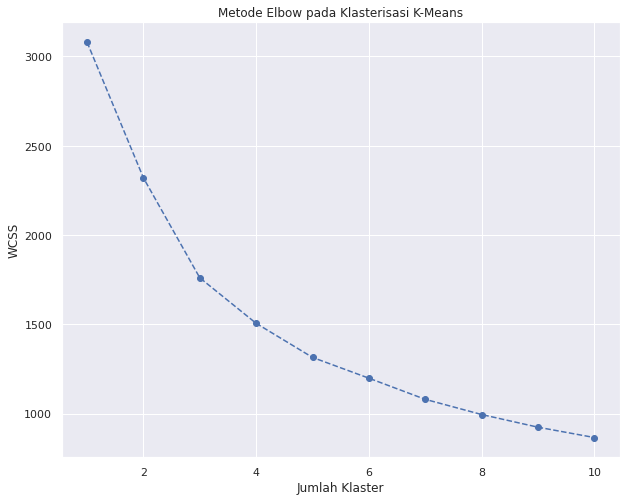

In [ ]:
# Memplot dengan WCSS method (Elbow Method) untuk perbandingan jumlah klaster.
# Dari visualisasi plot yang didapat, baru bisa ditentukan jumlah klaster yang optimum. 
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Jumlah Klaster')
plt.ylabel('WCSS')
plt.title('Metode Elbow pada Klasterisasi K-Means')
plt.savefig(fname='Elbow Method.png', dpi=None, facecolor='w', edgecolor='w',
        orientation='potrait', papertype=None, format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.2,
        frameon=None, metadata=None)
plt.show()

In [ ]:
# Mengeksekusi algoritma K-Means dengan jumlah klaster. Contoh untuk 5 klaster.
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)

In [ ]:
# Membagi data ke dalam 5 klaster.
kmeans.fit(segmentation_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [ ]:
# Mengeksekusi algoritma K-Means dengan jumlah klaster. Contoh untuk 4 klaster.
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [ ]:
# Membagi data ke dalam 4 klaster.
kmeans.fit(segmentation_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [ ]:
# Mengeksekusi algoritma K-Means dengan jumlah klaster. Contoh untuk 3 klaster.
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)

In [ ]:
# Membagi data ke dalam 3 klaster.
kmeans.fit(segmentation_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

# 7. Hasil Clustering

In [ ]:
#membuat data frame baru dengan variabel asli dan tambahkan satu kolom baru untuk data klaster .
df_segm_kmeans = df.copy()
df_segm_kmeans['Segment K-means'] = kmeans.labels_

In [ ]:
#hitung nilai mean untuk tiap klaster dan tampilkan berdasarkan klasternya
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis

,Usia,Tinggi Badan,Berat Badan,Lemak Tubuh,Kadar Air,Massa Otot,Kalori,Usia Sel,Kepadatan Tulang,Lemak Perut,Jenis Kelamin
Segment K-means,,,,,,,,,,,
0,43.426357,155.906977,76.400775,43.604651,41.417829,40.928682,1347.248062,62.023256,2.568217,10.511628,0.000000
1,36.155556,167.866667,72.237778,22.646667,56.913333,53.240000,1582.444444,37.088889,3.002222,10.244444,0.777778
2,38.349057,152.457547,54.299057,31.753774,49.941509,35.562264,1099.452830,38.905660,2.037736,5.424528,0.037736


In [ ]:
#hitung ukuran dan proporsi untuk 3 klaster 
df_segm_analysis['N Obs'] = df_segm_kmeans[['Segment K-means','Jenis Kelamin']].groupby(['Segment K-means']).count()
df_segm_analysis['Prop Obs'] = df_segm_analysis['N Obs'] / df_segm_analysis['N Obs'].sum()

In [ ]:
df_segm_analysis

,Usia,Tinggi Badan,Berat Badan,Lemak Tubuh,Kadar Air,Massa Otot,Kalori,Usia Sel,Kepadatan Tulang,Lemak Perut,Jenis Kelamin,N Obs,Prop Obs
Segment K-means,,,,,,,,,,,,,
0,43.426357,155.906977,76.400775,43.604651,41.417829,40.928682,1347.248062,62.023256,2.568217,10.511628,0.000000,129,0.460714
1,36.155556,167.866667,72.237778,22.646667,56.913333,53.240000,1582.444444,37.088889,3.002222,10.244444,0.777778,45,0.160714
2,38.349057,152.457547,54.299057,31.753774,49.941509,35.562264,1099.452830,38.905660,2.037736,5.424528,0.037736,106,0.378571


In [ ]:
df_segm_analysis.rename({0:'risk obesity-obesity',
                         1:'normal-risk obesity',
                         2:'low-normal'})

,Usia,Tinggi Badan,Berat Badan,Lemak Tubuh,Kadar Air,Massa Otot,Kalori,Usia Sel,Kepadatan Tulang,Lemak Perut,Jenis Kelamin,N Obs,Prop Obs
Segment K-means,,,,,,,,,,,,,
risk obesty-obesty,43.426357,155.906977,76.400775,43.604651,41.417829,40.928682,1347.248062,62.023256,2.568217,10.511628,0.000000,129,0.460714
normal-risk obesty,36.155556,167.866667,72.237778,22.646667,56.913333,53.240000,1582.444444,37.088889,3.002222,10.244444,0.777778,45,0.160714
low-normal,38.349057,152.457547,54.299057,31.753774,49.941509,35.562264,1099.452830,38.905660,2.037736,5.424528,0.037736,106,0.378571


In [ ]:
#tambahkan label segment ke dalam visualisasi klaster
df_segm_kmeans['Klaster'] = df_segm_kmeans['Segment K-means'].map({0:'risk obesity-obesity',
                                                                  1:'normal-risk obesity',
                                                                  2:'low-normal'})

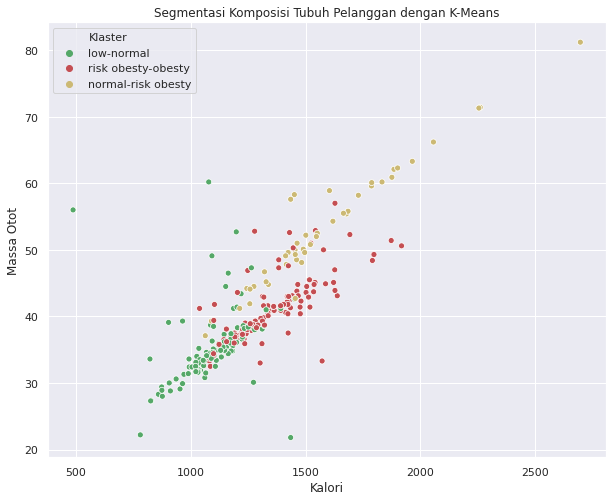

In [ ]:
#plot hasil dari algoritma KMeans 
#Tiap point di dalam dataset diplot dengan warna sesuai klasterm
x_axis = df_segm_kmeans['Kalori']
y_axis = df_segm_kmeans['Massa Otot']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_kmeans['Klaster'], palette = ['g', 'r', 'y'])
plt.title('Segmentasi Komposisi Tubuh Pelanggan dengan K-Means')
plt.show()

# 8. PCA (Principal Component Analysis)

In [ ]:
#Gunakan PCA untuk menemukan subset komponen, yang menjelaskan varians dalam data.
pca = PCA()

In [ ]:
#Fit PCA pada data yang sudah distandardisasi
pca.fit(segmentation_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
#Menampilkan rasio varians yang dijelaskan oleh ke 13 variabel.
pca.explained_variance_ratio_

array([0.40947557, 0.33053776, 0.11252106, 0.0438871 , 0.02477154,
       0.02086677, 0.0187083 , 0.01453086, 0.01105958, 0.00740494,
       0.00623654])

Text(0, 0.5, 'Cumulative Explained Variance')

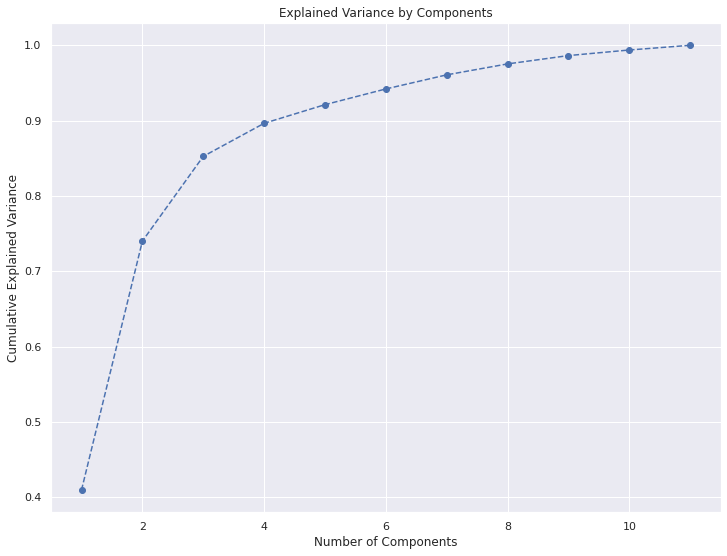

In [ ]:
#Plot cumulative variance explained dengan jumlah komponen.
#Pilih subset dari komponen yang ingin kita gunakan berdasarkan grafik ini. 
#Umumnya yang dipilih adalah 80% dari explained variance .
plt.figure(figsize = (12,9))
plt.plot(range(1,12), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [ ]:
#Memilih 3 komponen. *rekomendasi (2 atau 3)
pca = PCA(n_components = 3)

In [ ]:
#Fit model ke dalam data sesuai jumlah komponen yang dipilih.
pca.fit(segmentation_std)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

### ${\textbf{Hasil PCA}}$

In [ ]:
#Atribut dari komponen-komponen menunjukkan berdasarkan 12 variabel asli.
#Menampilkan nilai korelasi antara komponen-komponen dengan variabel asli. 
pca.components_

array([[-0.05642909,  0.29781141,  0.42490842,  0.15871948, -0.15381263,
         0.38505779,  0.43862535,  0.16498599,  0.39023647,  0.36747231,
         0.15337625],
       [-0.24279882,  0.32443782, -0.14006334, -0.44774517,  0.42692067,
         0.20620361,  0.11757293, -0.43490453,  0.13115345, -0.21411302,
         0.35341647],
       [ 0.73864089, -0.02220085, -0.11132629, -0.23278215,  0.24601591,
         0.13049845, -0.07518325,  0.25454771, -0.13126941,  0.28517154,
         0.37520727]])

In [ ]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = df.columns.values,
                           index = ['Component 1', 'Component 2', 'Component 3'])
df_pca_comp

,Usia,Tinggi Badan,Berat Badan,Lemak Tubuh,Kadar Air,Massa Otot,Kalori,Usia Sel,Kepadatan Tulang,Lemak Perut,Jenis Kelamin
Component 1,-0.056429,0.297811,0.424908,0.158719,-0.153813,0.385058,0.438625,0.164986,0.390236,0.367472,0.153376
Component 2,-0.242799,0.324438,-0.140063,-0.447745,0.426921,0.206204,0.117573,-0.434905,0.131153,-0.214113,0.353416
Component 3,0.738641,-0.022201,-0.111326,-0.232782,0.246016,0.130498,-0.075183,0.254548,-0.131269,0.285172,0.375207


([<matplotlib.axis.YTick at 0x7fe89cf94c88>,
 [Text(0, 0.5, 'Component 1'),
  Text(0, 1.5, 'Component 2'),
  Text(0, 2.5, 'Component 3')])

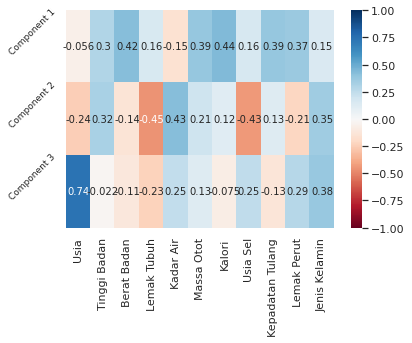

In [ ]:
#Menampilkan Heat map untuk Principal Components dengan Variabel asli (RdBu color scheme dan set borders = -1 dan 1)
sns.heatmap(df_pca_comp,
            vmin = -1, 
            vmax = 1,
            cmap = 'RdBu',
            annot = True)
plt.yticks([0, 1, 2], 
           ['Component 1', 'Component 2', 'Component 3'],
           rotation = 45,
           fontsize = 9)

In [ ]:
pca.transform(segmentation_std)

array([[-3.15007114e+00, -1.38990317e+00,  4.27540150e-01],
       [-1.38145737e+00, -1.15576814e+00,  9.07571153e-01],
       [ 8.94879132e-01,  7.12774228e-01, -1.45157550e+00],
       [ 2.07281433e+00,  1.67040033e+00,  3.20537806e+00],
       [ 3.60426412e+00, -2.59349012e+00, -3.52935063e-01],
       [ 1.30473446e+00, -2.12991122e-01,  2.17180114e+00],
       [ 2.40172373e+00, -1.76228703e-01, -3.46315860e-01],
       [ 7.98087460e-01, -2.48095460e+00,  1.82294665e-01],
       [ 7.73642491e-01, -1.92280878e+00,  4.76338414e-01],
       [ 8.60620157e-01, -3.30025277e+00,  5.26051012e-01],
       [-1.37819224e-01, -1.02804612e-01, -5.99344463e-01],
       [ 1.02900703e+00,  1.54032501e+00,  1.15498917e+00],
       [-2.14889044e+00,  4.16732671e+00,  8.64739031e-01],
       [-1.04749636e+00,  1.93850612e+00,  1.67056958e+00],
       [ 5.08791539e-01,  1.28572083e-01, -8.03185321e-01],
       [ 5.18218829e-01, -1.98641106e+00,  9.29378917e-01],
       [-2.91763352e-01, -2.02285425e+00

In [ ]:
scores_pca = pca.transform(segmentation_std)

### ${\textbf{K-means clustering with PCA}}$

In [ ]:
#Fit K-Means dengan data yang sudah ditransformasikan dari proses PCA sebelumnya.
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

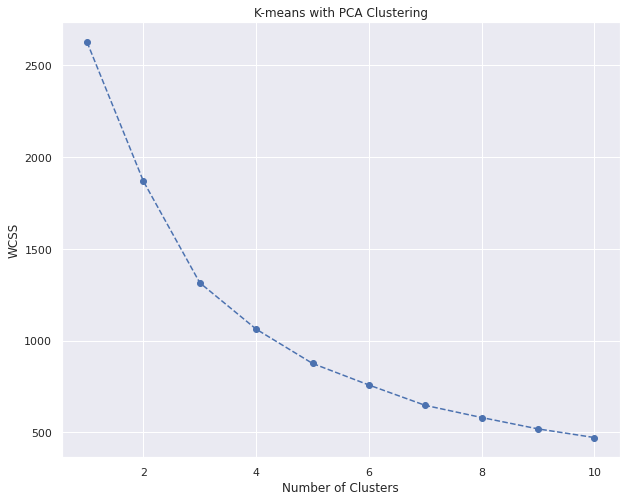

In [ ]:
#Plot lagi WCSS untuk model K-Means dengan PCA. Di sini kita membuat keputusan untuk menentukan jumlah klaster.
#Pilih 3 klaster.
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

In [ ]:
#Kita pilih 3 klaster
kmeans_pca = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)

In [ ]:
#Fit data dengan model K-Means PCA
kmeans_pca.fit(scores_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [ ]:
#Buat data frame dengan variabel asli dan menambahkan score PCA  and klaster yang ditetapkan.
df_segm_pca_kmeans = pd.concat([df.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']
#Menambahkan label klaster pada kolom terakhir.
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [ ]:
df_segm_pca_kmeans

,Usia,Tinggi Badan,Berat Badan,Lemak Tubuh,Kadar Air,Massa Otot,Kalori,Usia Sel,Kepadatan Tulang,Lemak Perut,Jenis Kelamin,Component 1,Component 2,Component 3,Segment K-means PCA
0,49,142.0,47.8,36.6,46.4,28.8,911,53,1.5,6,0,-3.150071,-1.389903,0.427540,0
1,59,150.0,58.6,36.7,46.3,35.0,1098,56,2.1,8,0,-1.381457,-1.155768,0.907571,0
2,24,167.0,73.0,37.9,45.5,42.6,1437,46,2.8,6,0,0.894879,0.712774,-1.451576,1
3,65,159.0,71.8,23.3,56.2,52.2,1501,45,2.9,17,1,2.072814,1.670400,3.205378,2
4,41,154.0,117.3,60.8,43.1,43.1,1638,66,2.8,18,0,3.604264,-2.593490,-0.352935,1
5,64,160.0,69.9,27.4,53.1,48.5,1383,60,2.6,17,0,1.304734,-0.212991,2.171801,1
6,46,170.0,72.3,56.6,45.1,52.9,1543,40,2.9,12,0,2.401724,-0.176229,-0.346316,1
7,48,150.0,79.2,48.2,37.9,38.6,1305,73,2.4,12,0,0.798087,-2.480955,0.182295,1
8,52,155.0,75.4,44.9,40.9,39.6,1304,73,2.5,11,0,0.773642,-1.922809,0.476338,1
9,57,150.0,76.7,47.1,28.7,38.1,1270,82,2.4,12,0,0.860620,-3.300253,0.526051,1


In [ ]:
#Menghitung mean per segment.
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segm_pca_kmeans_freq

,Usia,Tinggi Badan,Berat Badan,Lemak Tubuh,Kadar Air,Massa Otot,Kalori,Usia Sel,Kepadatan Tulang,Lemak Perut,Jenis Kelamin,Component 1,Component 2,Component 3
Segment K-means PCA,,,,,,,,,,,,,,
0,37.969388,151.841837,54.638776,32.964286,49.030612,35.107143,1094.775510,39.897959,2.018367,5.551020,0.010204,-1.885852,0.127151,-0.325549
1,43.747967,155.325203,74.678049,43.400813,41.569919,40.440650,1321.113821,62.178862,2.520325,10.235772,0.000000,0.667926,-1.320903,-0.086678
2,37.875000,165.275000,61.337500,18.447500,60.467500,47.385000,1380.775000,30.300000,2.715000,7.425000,0.700000,0.251322,3.239990,0.932712
3,35.631579,170.000000,98.347368,37.015789,45.315789,59.742105,1922.684211,53.894737,3.473684,15.368421,0.526316,4.873984,1.074246,0.276667


In [ ]:
#Hitung ukuran dari tiap klaster dan proporsinya.
df_segm_pca_kmeans_freq['N Obs'] = df_segm_pca_kmeans[['Segment K-means PCA','Jenis Kelamin']].groupby(['Segment K-means PCA']).count()
df_segm_pca_kmeans_freq['Prop Obs'] = df_segm_pca_kmeans_freq['N Obs'] / df_segm_pca_kmeans_freq['N Obs'].sum()
df_segm_pca_kmeans_freq = df_segm_pca_kmeans_freq.rename({0:'risk obesity-obesity',
                                                          1:'normal-risk obesity',
                                                          2:'low-normal'})
df_segm_pca_kmeans_freq

,Usia,Tinggi Badan,Berat Badan,Lemak Tubuh,Kadar Air,Massa Otot,Kalori,Usia Sel,Kepadatan Tulang,Lemak Perut,Jenis Kelamin,Component 1,Component 2,Component 3,N Obs,Prop Obs
Segment K-means PCA,,,,,,,,,,,,,,,,
risk obesty-obesty,37.969388,151.841837,54.638776,32.964286,49.030612,35.107143,1094.775510,39.897959,2.018367,5.551020,0.010204,-1.885852,0.127151,-0.325549,98,0.350000
normal-risk obesty,43.747967,155.325203,74.678049,43.400813,41.569919,40.440650,1321.113821,62.178862,2.520325,10.235772,0.000000,0.667926,-1.320903,-0.086678,123,0.439286
low-normal,37.875000,165.275000,61.337500,18.447500,60.467500,47.385000,1380.775000,30.300000,2.715000,7.425000,0.700000,0.251322,3.239990,0.932712,40,0.142857
3,35.631579,170.000000,98.347368,37.015789,45.315789,59.742105,1922.684211,53.894737,3.473684,15.368421,0.526316,4.873984,1.074246,0.276667,19,0.067857


In [ ]:
df_segm_pca_kmeans['Legend'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'risk obesity-obesity',
                                                          1:'normal-risk obesity',
                                                          2:'low-normal'})

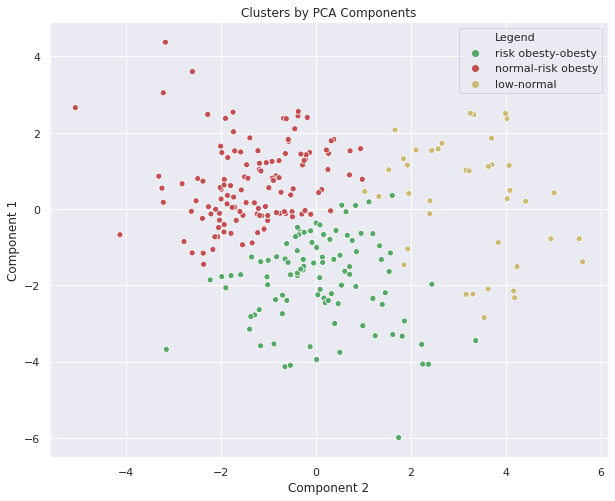

In [ ]:
#Plot data berdasarkan PCA komponen. Y axis sebagai komponen pertama, X axis sebagai komponen kedua.
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Legend'], palette = ['g', 'r', 'y'])
plt.title('Klaster berdasarkan Komponen PCA')
plt.show()